In [1]:
!pip install s3fs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-ai 2.9.1 requires faiss-cpu, which is not installed.
datasets 2.17.0 requires fsspec[http]<=2023.10.0,>=2023.1.0, but you have fsspec 2024.3.1 which is incompatible.
jupyter-scheduler 2.5.1 requires fsspec==2023.6.0, but you have fsspec 2024.3.1 which is incompatible.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import s3fs

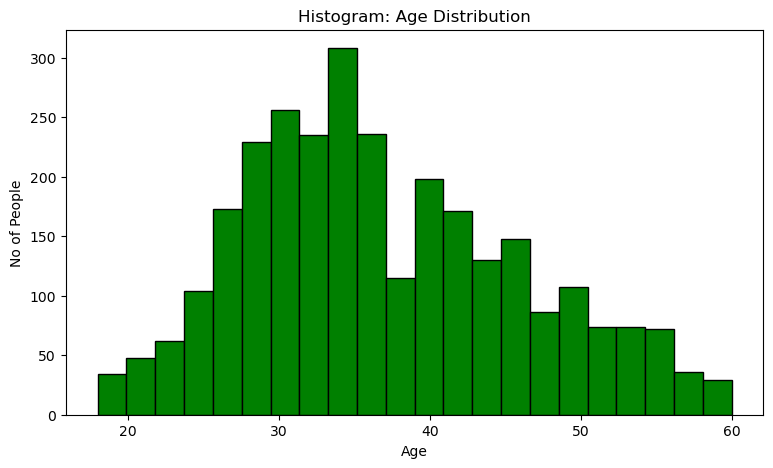

In [6]:
file_path = "s3://bucket261/FinalHRDataset.csv"

dataframe = pd.read_csv(file_path)

plt.figure(figsize=(9,5))
plt.title("Histogram: Age Distribution")
plt.hist(dataframe['Age'],bins=22,color="green",edgecolor="black")
plt.ylabel("No of People")
plt.xlabel("Age")
plt.show()


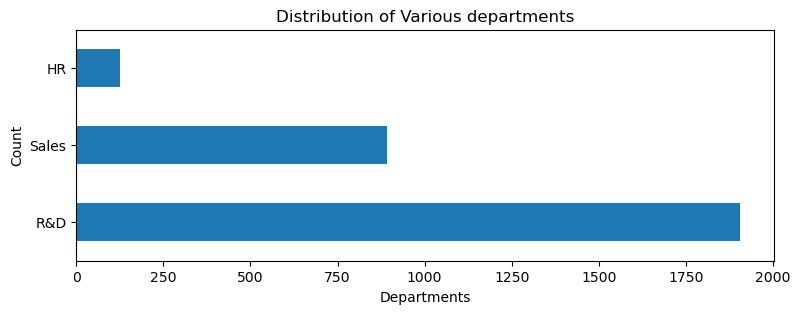

In [10]:
plt.figure(figsize=(9,3))
dataframe['Department'].value_counts().plot(kind='barh')
plt.ylabel('Count')
plt.xlabel('Departments')
plt.title('Distribution of Various departments')
plt.show()

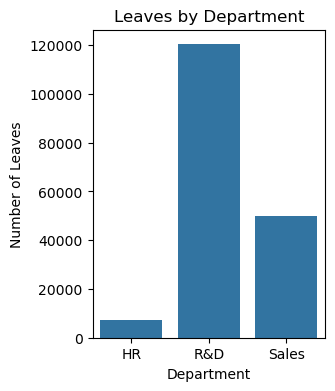

In [27]:
import seaborn as sns
department_leaves = dataframe.groupby('Department')['Leaves'].sum().reset_index()
department_leaves
plt.figure(figsize=(3, 4))
sns.barplot(x=department_leaves['Department'], y='Leaves', data=department_leaves)
plt.title('Leaves by Department')
plt.xlabel('Department')
plt.ylabel('Number of Leaves')
plt.show()


In [34]:
import pandas as pd

file_path = "s3://bucket261/cs_new"

df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.sort_values(by=['user_id', 'timestamp'], inplace=True)
user_session_start = {}
session_time = {}
for index, row in df.iterrows():
    user_id = row['user_id']
    timestamp = row['timestamp']
    
    if user_id not in user_session_start:
        user_session_start[user_id] = timestamp
    
    elif (timestamp - user_session_start[user_id]).total_seconds() > 30 * 60:
        # Calculate session time
        session_time[user_id] = timestamp - user_session_start[user_id]
        
        # Update session start time
        user_session_start[user_id] = timestamp
        
for user_id, start_time in user_session_start.items():
    session_time[user_id] = df[df['user_id'] == user_id]['timestamp'].iloc[-1] - start_time

for user_id, time_delta in session_time.items():
    print(f"User {user_id}: Session time = {time_delta}")



User 06109259-5d6c-4187-9204-ca87f6fd5c26: Session time = 0 days 00:00:01
User 0babfd89-6433-4836-b221-e021084f8b59: Session time = 0 days 00:00:02
User 0eb99feb-996c-49ce-a31c-23012a4cfeb5: Session time = 0 days 00:00:00
User 166fba4d-3b73-4ab9-85d6-10ffddd385b4: Session time = 0 days 00:00:04
User 1bf0ca0e-c601-435a-aa86-4058f985c32b: Session time = 0 days 00:00:05
User 214e877f-3b63-4a08-8db5-97679460f8ac: Session time = 0 days 00:00:05
User 2785b5d4-ebfd-4a02-b1a8-3dd11b518fb5: Session time = 0 days 00:00:03
User 27eede25-af72-4ef6-b535-19fc4586189d: Session time = 0 days 00:00:02
User 293cf2ca-f494-44a5-a7e2-315d78e28afc: Session time = 0 days 00:00:00
User 2a5832e0-20dd-4071-bfc9-11a98300c828: Session time = 0 days 00:00:01
User 2ab51a08-7443-45e5-9654-9a72904a9bb3: Session time = 0 days 00:00:02
User 2df003b4-3b29-4edd-b946-e163c4531e1f: Session time = 0 days 00:00:00
User 2e547cc0-4356-443d-928a-847a145b1677: Session time = 0 days 00:00:03
User 2e62050e-2de4-4292-b239-6ec374cac

In [35]:

# Filter only the "purchase" events
purchase_events = df[df['event_type'] == 'purchase']

# Convert the 'timestamp' column to datetime format
purchase_events['timestamp'] = pd.to_datetime(purchase_events['timestamp'])

# Group by 'user_id' and find the first purchase time for each user
first_purchase_times = purchase_events.groupby('user_id')['timestamp'].min().reset_index()

# Rename the columns for clarity
first_purchase_times.columns = ['User ID', 'First Purchase Time']

# Display the DataFrame
print(first_purchase_times)


                                 User ID First Purchase Time
0   0babfd89-6433-4836-b221-e021084f8b59 2024-03-26 14:57:10
1   0eb99feb-996c-49ce-a31c-23012a4cfeb5 2024-03-26 14:58:15
2   166fba4d-3b73-4ab9-85d6-10ffddd385b4 2024-03-26 14:53:50
3   1bf0ca0e-c601-435a-aa86-4058f985c32b 2024-03-26 14:57:33
4   214e877f-3b63-4a08-8db5-97679460f8ac 2024-03-26 14:52:45
..                                   ...                 ...
73  f32dadcb-6276-4f58-bcc5-184fdc4659af 2024-03-26 14:54:47
74  f33d1d6c-b6a7-48b7-bd83-6bedb1291596 2024-03-26 14:56:05
75  f6fc48cf-918e-415e-bcb9-ea886d7954bb 2024-03-26 14:59:21
76  fd64694a-505f-4857-a8c9-517367a7ef03 2024-03-26 14:51:35
77  ff5bdf4f-efb8-41c9-bc9b-f2126cf97298 2024-03-26 14:57:46

[78 rows x 2 columns]


/tmp/ipykernel_99/2201290795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['timestamp'] = pd.to_datetime(purchase_events['timestamp'])
